# 1-Librairies

In [345]:
# Standard
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
import kagglehub

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

# Division du dataset
from sklearn.model_selection import train_test_split

# Modèle de regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb

# Métriques de performance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Optimisation du modèle testé
from sklearn.model_selection import GridSearchCV

from scipy.stats import boxcox

# Suppression des warnings
import warnings
warnings.filterwarnings("ignore")

# 2-Dataset

In [346]:
# Charger les données
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")
df = pd.read_csv(f"{path}/brain_tumor_dataset.csv")

# 3- Analyse Exploratoire des Données (EDA)

In [347]:
# Visualisation du dataset
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [348]:
# Information du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [349]:
# Supression de colonne inutile
df=df.drop('Patient_ID',axis=1)
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [350]:
# Verification si donnéées manquantes
df.isnull().sum()

Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

<Axes: title={'center': 'Taux de survie'}, xlabel='Survival_Rate', ylabel='Count'>

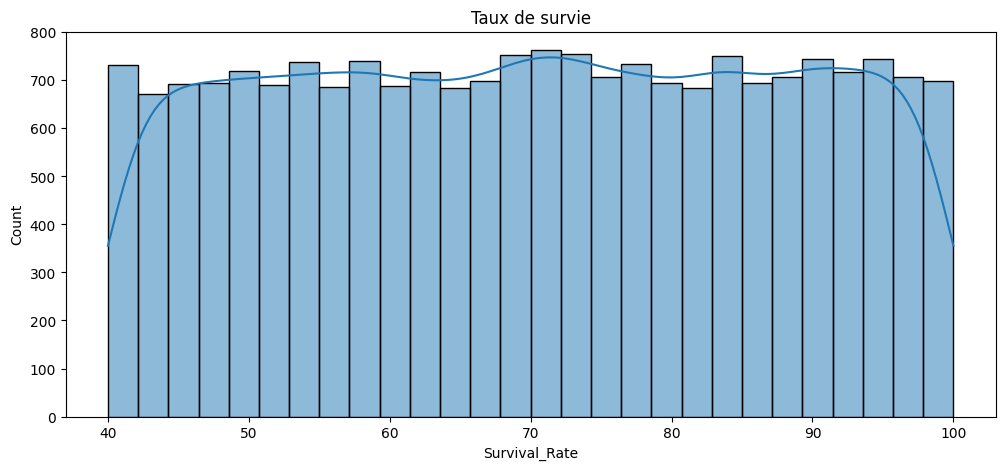

In [351]:
# Visualisation par histogramme
fig, ax = plt.subplots(figsize=(12,5))

ax.set_title('Taux de survie')
sns.histplot(
    data=df,
    x='Survival_Rate',
    kde=True,
    ax=ax
)

# 4-Preprocessing

## 4.1-One Hot Encoding

In [352]:
# Identifier les colonnes catégorielles (hors 'Survival_Rate' qui est la cible)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Appliquer One-Hot Encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Afficher les premières lignes du DataFrame avec One-Hot Encoding
print("DataFrame after One-Hot Encoding:")
display(df_processed.head())

DataFrame after One-Hot Encoding:


,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Tumor_Type_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True
1,26,4.847098,46.373273,2.165736,True,False,False,True,False,True,...,False,True,False,False,True,True,True,True,True,True
2,31,5.588391,47.072221,1.884228,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,29,1.436600,51.853634,1.283342,True,True,False,False,True,False,...,False,False,False,False,True,False,True,True,False,False
4,54,2.417506,54.708987,2.069477,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,True


## 4.2-Iteration et polynomial

In [353]:

# Créer une caractéristique d'interaction
df_processed['Tumor_Size_Growth_Interaction'] = df_processed['Tumor_Size'] * df_processed['Tumor_Growth_Rate']

# Créer des caractéristiques polynomiales pour l'âge et la taille de la tumeur (degré 2)
df_processed['Age_squared'] = df_processed['Age']**2
df_processed['Tumor_Size_squared'] = df_processed['Tumor_Size']**2

# Afficher les premières lignes du DataFrame avec les nouvelles caractéristiques
print("DataFrame after adding interaction and polynomial features:")
display(df_processed.head())

DataFrame after adding interaction and polynomial features:


,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Tumor_Type_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes,Tumor_Size_Growth_Interaction,Age_squared,Tumor_Size_squared
0,73,5.375612,51.312579,0.111876,True,True,False,False,True,False,...,False,False,False,False,False,True,True,0.601400,5329,28.897200
1,26,4.847098,46.373273,2.165736,True,False,False,True,False,True,...,False,True,True,True,True,True,True,10.497532,676,23.494357
2,31,5.588391,47.072221,1.884228,True,False,False,True,False,False,...,False,False,False,False,False,False,False,10.529801,961,31.230111
3,29,1.436600,51.853634,1.283342,True,True,False,False,True,False,...,False,True,False,True,True,False,False,1.843649,841,2.063819
4,54,2.417506,54.708987,2.069477,False,False,False,True,False,True,...,False,False,False,True,False,True,True,5.002974,2916,5.844335


## 4.3-Matrice de corelation

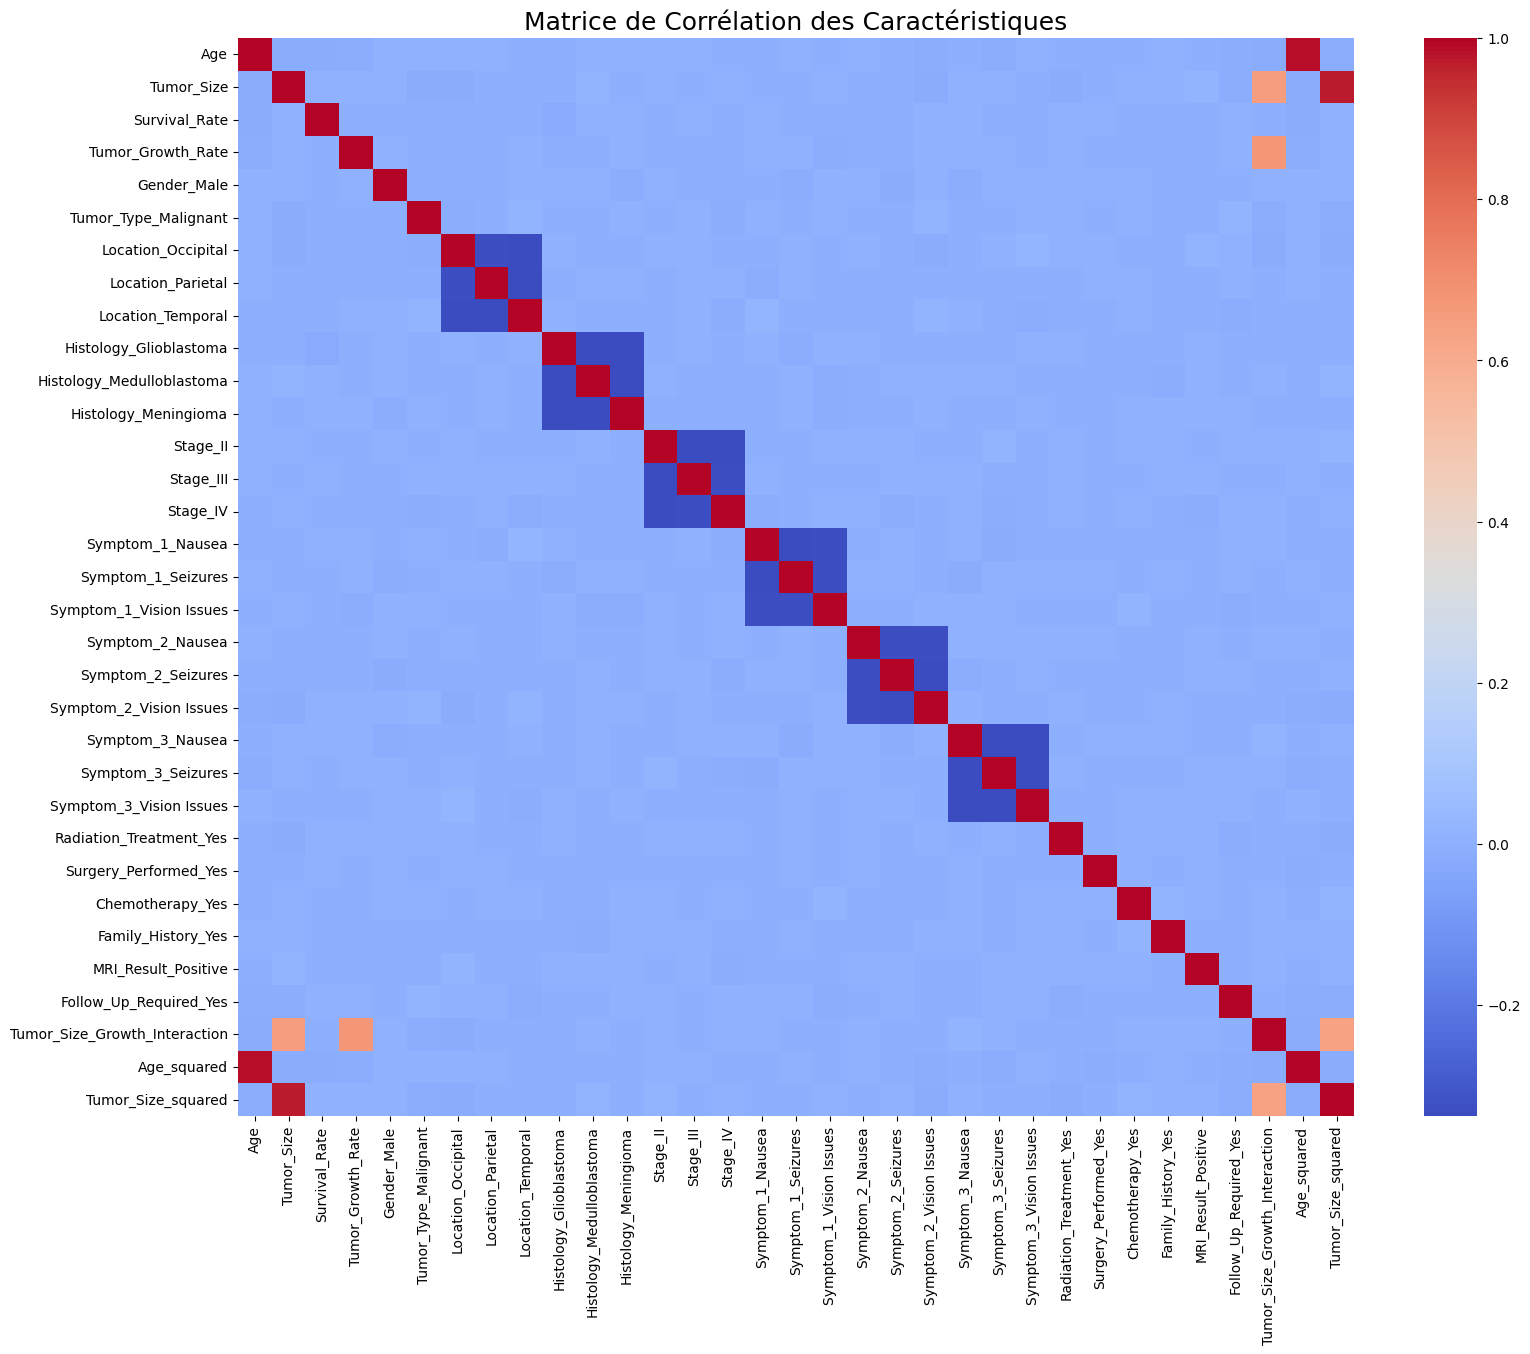

In [354]:
# Calculer la matrice de corrélation
correlation_matrix = df_processed.corr()

# Afficher la matrice de corrélation à l'aide d'une heatmap
plt.figure(figsize=(18, 14)) # Ajustez la taille si nécessaire
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Caractéristiques', fontsize=18)
plt.show()

## 4.4-StandardScaler

In [355]:
# Définir les features (X) et la cible (y)
X = df_processed.drop('Survival_Rate', axis=1)
y = df_processed['Survival_Rate']

# Diviser les données en sous-ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise a l'echelle des features numériques
# Identifier les colonnes numériques à scaler (exclure les colonnes booléennes créées par one-hot encoding)
numerical_cols_to_scale = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

# Afficher les premières lignes des données mises à l'échelle
print("\nPremières lignes de X_train après mise à l'échelle:")
display(X_train.head())

Dimensions de l'ensemble d'entraînement (X_train, y_train): (16000, 32) (16000,)
Dimensions de l'ensemble de test (X_test, y_test): (4000, 32) (4000,)

Premières lignes de X_train après mise à l'échelle:


,Age,Tumor_Size,Tumor_Growth_Rate,Gender_Male,Tumor_Type_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,...,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes,Tumor_Size_Growth_Interaction,Age_squared,Tumor_Size_squared
5894,-0.535442,-0.585606,0.108763,False,False,True,False,False,True,False,...,False,False,True,False,False,True,True,-0.332595,-0.651697,-0.736062
3728,-0.420672,0.302410,0.310344,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,0.432573,-0.557712,0.061115
8958,-0.191132,0.259954,0.801447,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,0.772153,-0.355989,0.013825
7671,1.128725,-1.314975,-0.687134,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,-0.995928,1.159803,-1.089261
5999,-0.133747,0.848646,0.844879,True,False,False,False,False,False,False,...,False,True,True,False,True,False,True,1.361177,-0.302692,0.751745


## 4.5-Visualisation des transformations

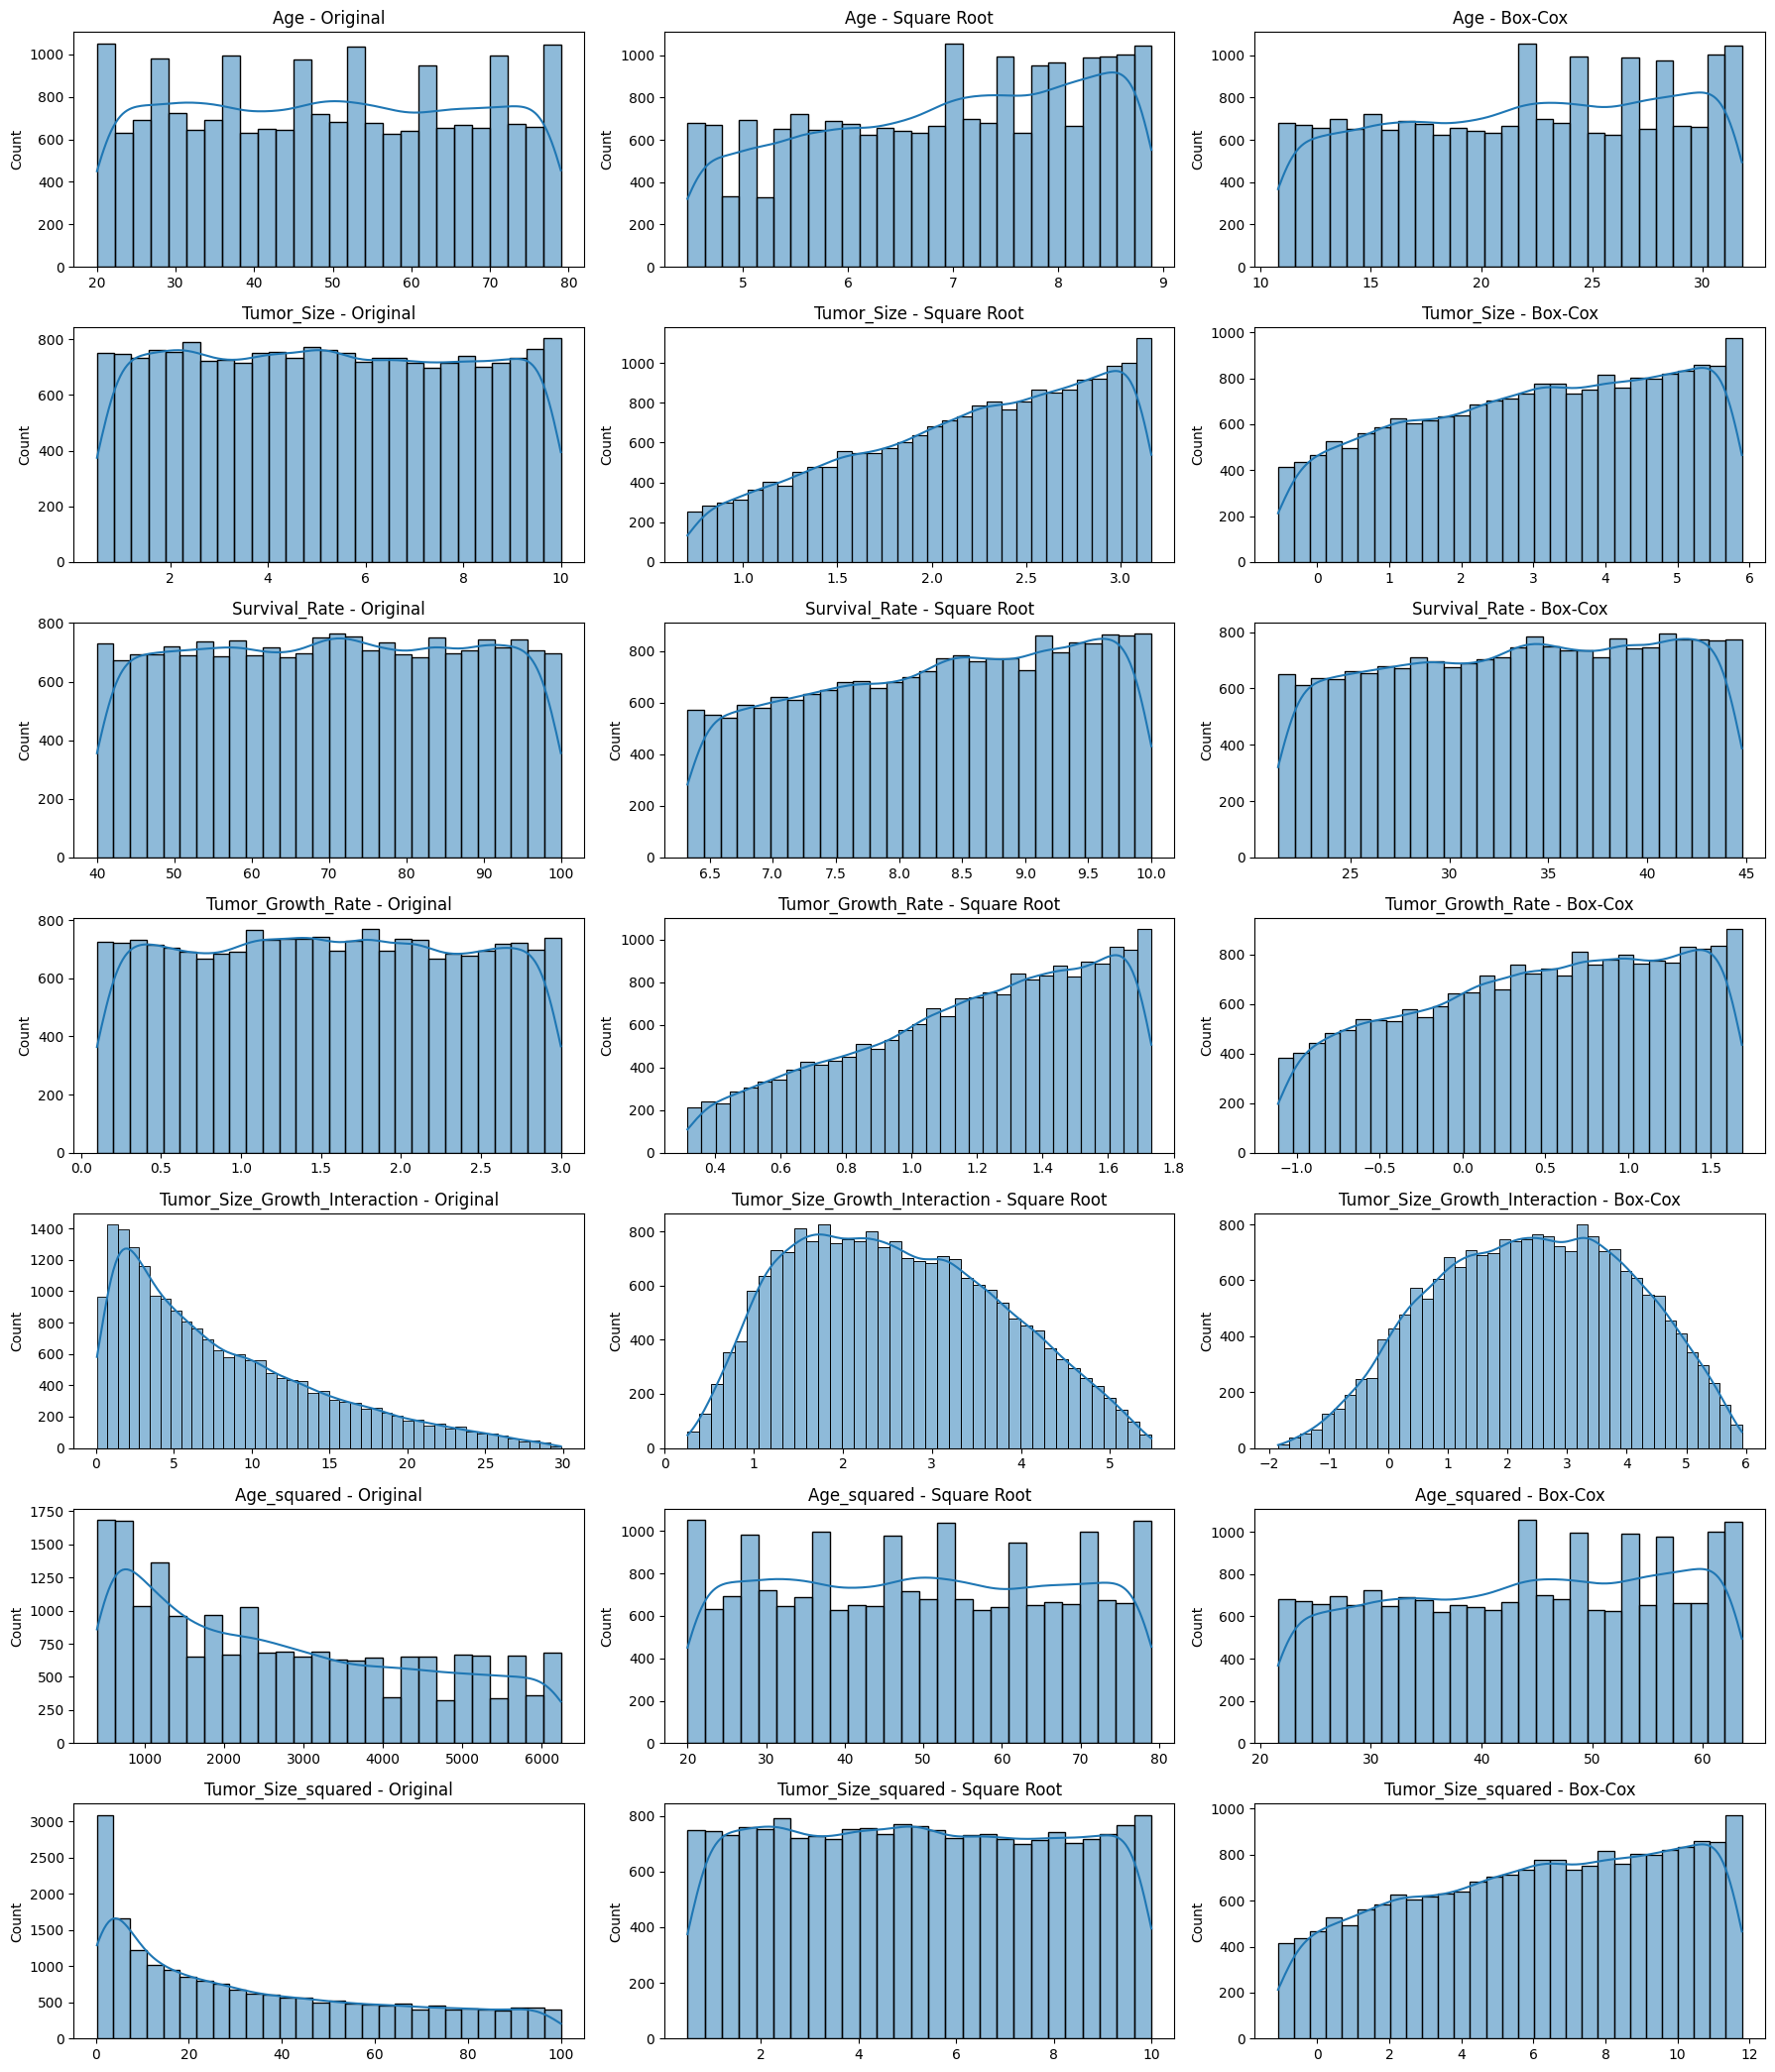

In [364]:
numerical_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate', 'Tumor_Size_Growth_Interaction', 'Age_squared', 'Tumor_Size_squared']
num_cols = len(numerical_cols)
num_transforms = 3 # Original, Square Root, Box-Cox

# Determine the grid size. Let's use 7 rows and 3 columns (one row per feature, one column per transform type)
n_rows = num_cols
n_cols = num_transforms

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3)) # Adjust figsize as needed

for i, col in enumerate(numerical_cols):
    # Original distribution
    sns.histplot(df_processed[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Original')
    axes[i, 0].set_xlabel('') # Clear x-label for clarity in subplots

    # Transformation using Square Root
    # Ensure the column exists from previous processing or re-calculate
    if f'{col}_sqrt' not in df_processed.columns:
        df_processed[f'{col}_sqrt'] = np.sqrt(df_processed[col])
    sns.histplot(df_processed[f'{col}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Square Root')
    axes[i, 1].set_xlabel('')

    # Box-Cox Transformation (only if values are positive)
    if (df_processed[col] > 0).all():
        # Ensure the column exists from previous processing or re-calculate
        if f'{col}_boxcox' not in df_processed.columns:
            df_processed[f'{col}_boxcox'], _ = boxcox(df_processed[col])
        sns.histplot(df_processed[f'{col}_boxcox'], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'{col} - Box-Cox')
        axes[i, 2].set_xlabel('')
    else:
        axes[i, 2].set_title(f'{col} - Box-Cox (Not Applicable)')
        axes[i, 2].axis('off') # Hide the axis if not applicable


plt.tight_layout()
plt.show()

In [357]:
# Definir les features (X) et la cible (y)
# Assumer que df_processed contient les features après encodage et transformations potentielles
X = df_processed.drop('Survival_Rate', axis=1)
y = df_processed['Survival_Rate']

# Diviser les données en sous-ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les colonnes numériques à scaler (exclure les colonnes booléennes créées par one-hot encoding)
# Selectioner les colonnes avec des types numériques qui ne sont pas booléens
numerical_cols_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()
boolean_cols = X_train.select_dtypes(include=bool).columns.tolist()
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in boolean_cols]

# Scaler les colonnes numériques
scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])


# 5-Entraînement et évaluation des modèles

## 5.1-Modeles de regression

In [358]:

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

## 5.2-Entrainement

In [359]:
# Create an empty dictionary to store results
results = {}

for name, model in models.items():
    # Train the models
    model.fit(X_train, y_train)

    # Predict on the Test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    accuracy = 100 - mape

    # Store the metrics in the results dictionary
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy
    }

    # Print performance metrics
    print(f"Performance de {name}:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.2f}%\n")

Performance de LinearRegression:
Mean Absolute Error: 0.0146
Mean Squared Error: 0.0003
R^2 Score: 1.0000
Accuracy: 99.98%

Performance de Ridge:
Mean Absolute Error: 0.0692
Mean Squared Error: 0.0064
R^2 Score: 1.0000
Accuracy: 99.90%

Performance de Decision Tree:
Mean Absolute Error: 0.0053
Mean Squared Error: 0.0001
R^2 Score: 1.0000
Accuracy: 99.99%

Performance de Random Forest:
Mean Absolute Error: 0.0027
Mean Squared Error: 0.0000
R^2 Score: 1.0000
Accuracy: 100.00%

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3988
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 46
[LightGBM] [Info] Start training from score 70.087432
Performance de LightGBM:
Mean Absolute Error: 0.0534
Mean Squared Error: 0.0041
R^2 Score: 1.0000